In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading dataset
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Changing job_posted_date to date time format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\jakey\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df.pivot_table(values= 'salary_year_avg',index = 'job_country', columns = 'job_title_short',aggfunc= 'median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


Text(0.5, 1.0, 'Median Salary by Country and Job title')

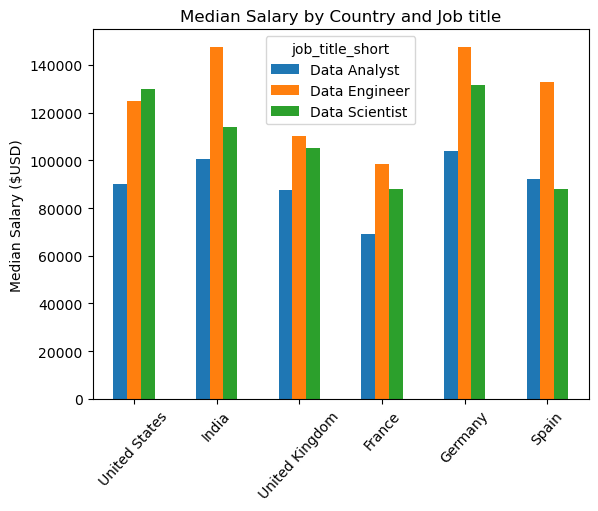

In [5]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values = 'salary_year_avg',
    index = 'job_country',
    columns = 'job_title_short',
    aggfunc ='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary.plot(kind = 'bar')
plt.xticks(rotation = 48)
plt.xlabel('')
plt.ylabel('Median Salary ($USD)')
plt.title('Median Salary by Country and Job title')

In [32]:
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

<Axes: xlabel='job_country'>

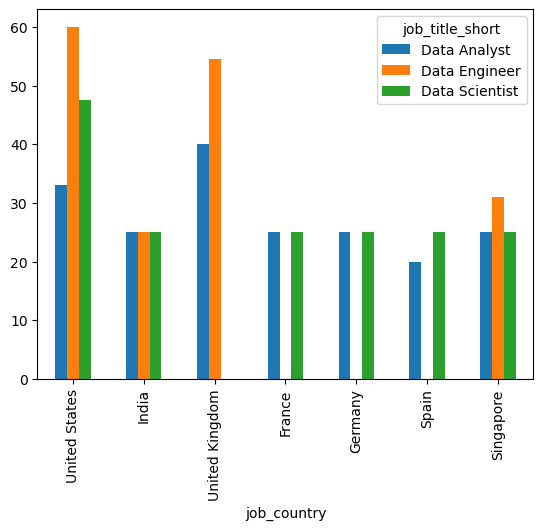

In [60]:
random_country = df['job_country'].value_counts().head(7).index
median_hour_salary = df.pivot_table(
    values = 'salary_hour_avg', 
    index = 'job_country', 
    columns = 'job_title_short', 
    aggfunc= 'median'
)
median_hour_salary = median_hour_salary.loc[random_country]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
median_hour_salary = median_hour_salary[job_titles]
median_hour_salary.plot(kind = 'bar')


In [61]:
random_country = df['job_country'].sample(n = 5, random_state= 43).value_counts().index
random_country


Index(['United States', 'France', 'Italy', 'Argentina'], dtype='object', name='job_country')

In [62]:
df[df['job_country'] == 'Italy']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
46,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"['sas', 'sas', 'r', 'python', 'vba', 'sql', 'j...","{'analyst_tools': ['sas', 'spss', 'tableau', '..."
102,Data Scientist,Data Scientist,"Rome, Metropolitan City of Rome Capital, Italy",via BeBee,Full-time,False,Italy,2023-08-30 13:40:46,False,False,Italy,None,NaN,NaN,Avangarde Consulting,"['python', 'sql', 'r', 'java']","{'programming': ['python', 'sql', 'r', 'java']}"
167,Data Scientist,Data Scientist,Anywhere,via Indeed,Full-time,True,Italy,2023-10-26 13:16:37,False,False,Italy,None,NaN,NaN,MAS Management Network,"['sql', 'gcp', 'oracle', 'airflow', 'microstra...","{'analyst_tools': ['microstrategy', 'power bi'..."
215,Data Scientist,Data Scientist,"Milan, Metropolitan City of Milan, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-02-02 13:49:23,False,False,Italy,None,NaN,NaN,JobLeads GmbH,"['sql', 'python', 'r', 'c++', 'java', 'scala',...","{'analyst_tools': ['sap', 'power bi', 'alteryx..."
321,Data Analyst,Data Analyst Informatica PowerCenter,"Rome, Metropolitan City of Rome, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-01-21 13:37:45,True,False,Italy,None,NaN,NaN,Beta 80 spa,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785489,Software Engineer,System Engineer VMWare,Italy,via Lavoro Trabajo.org,Full-time,False,Italy,2023-05-06 06:34:00,True,False,Italy,None,NaN,NaN,Herzum Software S.R.L. Unipersonale,['vmware'],{'cloud': ['vmware']}
785527,Business Analyst,Bi Specialist,"Bologna, Metropolitan City of Bologna, Italy",via BeBee,Full-time,False,Italy,2023-01-28 07:12:08,False,False,Italy,None,NaN,NaN,GIGROUP,"['sql', 'sql server', 'oracle', 'power bi', 'd...","{'analyst_tools': ['power bi', 'dax'], 'cloud'..."
785573,Data Scientist,DATA SPECIALIST FRONT END,"Torino di Sangro, Province of Chieti, Italy",via BeBee,Full-time,False,Italy,2023-01-08 06:08:32,False,False,Italy,None,NaN,NaN,LAVOROPIU' S.P.A. AGENZIA PER IL LAVORO,"['sql', 'html', 'css', 'javascript']","{'programming': ['sql', 'html', 'css', 'javasc..."
785614,Data Engineer,Data Engineer,"Milan, Metropolitan City of Milan, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-01-03 06:09:02,False,False,Italy,None,NaN,NaN,Kineton,"['python', 'sql', 'nosql', 'r', 'scala', 'java...","{'cloud': ['aws', 'gcp', 'azure'], 'programmin..."


<Axes: xlabel='job_country'>

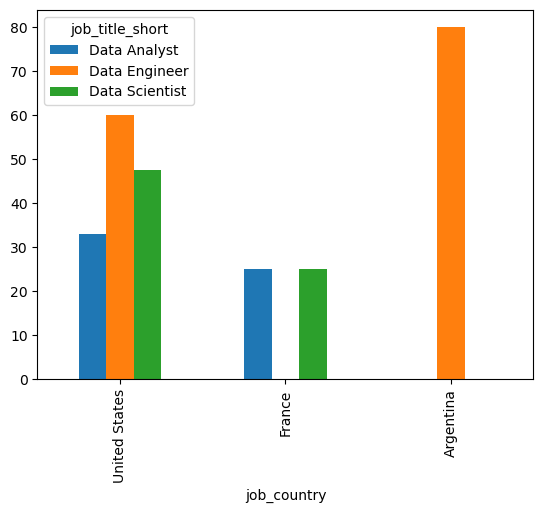

In [63]:
# Sample random countries
random_country = df['job_country'].sample(n=5, random_state=43).value_counts().index

# Calculate the median hourly salary
median_hour_salary = df.pivot_table(
    values='salary_hour_avg', 
    index='job_country', 
    columns='job_title_short', 
    aggfunc='median'
)

# Filter random_country to include only countries in median_hour_salary index
random_country = [country for country in random_country if country in median_hour_salary.index]

# Select rows for the filtered countries
median_hour_salary = median_hour_salary.loc[random_country]

# Filter columns for specific job titles
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
median_hour_salary = median_hour_salary[job_titles]

# Plot the results
median_hour_salary.plot(kind='bar')
